<a href="https://colab.research.google.com/github/Clestxn/AVA1-Spotify-Popularity-Tracks/blob/main/analise_faixas_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação da API Spotify e autenticação

In [ ]:
!pip install spotipy pandas matplotlib

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import requests
import base64
import pickle
import plotly.express as px

CLIENT_ID = '768aa42d84d8465ba6795c5da91d0d5e'
CLIENT_SECRET = '7afdcc995bff469e9ec19521c60f4a16'

def autenticar_spotify():
    auth_manager = SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET
    )
    return spotipy.Spotify(auth_manager=auth_manager)

sp = autenticar_spotify()

## Coleta de Dados (Tracks)

In [ ]:
def dados_tracks(ids_tracks):
    response = sp.tracks(ids_tracks)
    tracks = response['tracks']
    dados = []

    for track in tracks:
        dados.append({
            'track_id': track['id'],
            'track_name': track['name'],
            'popularity': track['popularity'],
            'duration_ms': track['duration_ms'],
            'artist_name': track['artists'][0]['name'],
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date'],
            'explicit': track['explicit'] if 'explicit' in track else False
        })

    return pd.DataFrame(dados)

In [ ]:
def dados_tracks(ids_tracks):
    response = sp.tracks(ids_tracks)
    tracks = response['tracks']
    dados = []
    invalid_ids = []

    for track, track_id in zip(tracks, ids_tracks):
        if track is None:
            invalid_ids.append(track_id)
            continue

        duration_min = round(track['duration_ms'] / 60000, 2)

        if duration_min < 2:
            duration_category = 'curta'
        elif 2 <= duration_min <= 5:
            duration_category = 'padrão'
        else:
            duration_category = 'longa'

        if track['popularity'] > 75:
            popularity_category = 'alta'
        elif 40 <= track['popularity'] <= 75:
            popularity_category = 'moderada'
        else:
            popularity_category = 'baixa'

        dados.append({
            'track_id': track['id'],
            'track_name': track['name'],
            'popularity': track['popularity'],
            'duration_min': duration_min,
            'artist_name': track['artists'][0]['name'],
            'album_name': track['album']['name'],
            'release_year': track['album']['release_date'][:4],
            'duration_category': duration_category,
            'popularity_category': popularity_category
        })

    if invalid_ids:
        print(f"IDs inválidos: {invalid_ids}")
    else:
        print("Todos os IDs são válidos.")
    df = pd.DataFrame(dados)
    df['classe_faixa'] = df['duration_category'] + '_' + df['popularity_category']
    return df
    return pd.DataFrame(dados)

In [ ]:
ids_tracks = [
    '6habFhsOp2NvshLv26DqMb', '7qiZfU4dY1lWllzX7mPBI3', '4w8niZpiMy6qz1mntFA5uM',
    '5CtI0qwDJkDQGwXD1H1cLb', '6WrI0LAC5M1Rw2MnX2ZvEg', '1AhDOtG9vPSOmsWgNW0BEY',
    '5nTtCOCds6I0PHMNtqelas', '6PGoSes0D9eUDeeAafB2As', '1zB4vmk8tFRmM9UULNzbLB',
    '5W3cjX2J3tjhG8zb6u0qHn', '4xkOaSrkexMciUUogZKVTS', '7sO5G9EABYOXQKNPNiE9NR',
    '4VUwkH455At9kENOfzTqmF', '4fSIb4hdOQ151TILNsSEaF', '7fBv7CLKzipRk6EC6TWHOB',
    '3Ofmpyhv5UAQ70mENzB277', '4ZtFanR9U6ndgddUvNcjcG', '3AJwUDP919kvQ9QcozQPxg',
    '7MXVkk9YMctZqd1Srtv4MB', '0VjIjW4GlUZAMYd2vXMi3b', '0e7ipj03S05BNilyu5bRzt',
    '2Fxmhks0bxGSBdJ92vM42m', '4iJyoBOLtHqaGxP12qzhQI', '5HCyWlXZPP0y6Gqq8TgA20',
    '0t1kP63rueHleOhQkYSXFY', '2JzZzZUQj3Qff7wapcbKjc', '1xQ6trAsedVPCdbtDAmk0c',
    '0RIHDrcRAXtUlnkvTYPW1a', '5mCPDVBb16L4XQwDdbRUpz', '6I3mqTwhRpn34SLVafSH7G',
    '1Cv1YLb4q0RzL6pybtaMLo', '0RIHDrcRAXtUlnkvTYPW1a', '6habFhsOp2NvshLv26DqMb',
    '6H3kDe7CGoWYBabAeVWGiD', '2xLMifQCjDGFmkHkpNLD9h', '2YpeDb67231RjR0MgVLzsG',
    '1rqqCSm0Qe4I9rUvWncaom', '7BKLCZ1jbUBVqRi2FVlTVw', '7qiZfU4dY1lWllzX7mPBI3',
    '5KawlOMHjWeUjQtnuRs22c', '1DFD5Fotzgn6yYXkYsKiGs', '3ZCTVFBt2Brf31RLEnCkWJ',
    '6K4t31amVTZDgR3sKmwUJJ', '2takcwOaAZWiXQijPHIx7B', '3KkXRkHbMCARz0aVfEt68P',
    '2dLLR6qlu5UJ5gk0dKz0h3', '5uEYRdEIh9Bo4fpjDd4Na9', '0eGsygTp906u18L0Oimnem',
    '0K6yUnIKNsFtfIpTgGtcHm', '3DamFFqW32WihKkTVlwTYQ'
]


df_tracks = dados_tracks(ids_tracks)
df_tracks

Todos os IDs são válidos.


,track_id,track_name,popularity,duration_min,artist_name,album_name,release_year,duration_category,popularity_category,classe_faixa
0,6habFhsOp2NvshLv26DqMb,Despacito,83,3.82,Luis Fonsi,VIDA,2019,padrão,alta,padrão_alta
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,90,3.90,Ed Sheeran,÷ (Deluxe),2017,padrão,alta,padrão_alta
2,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",75,3.54,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",2018,padrão,moderada,padrão_moderada
3,5CtI0qwDJkDQGwXD1H1cLb,Despacito - Remix,5,3.81,Luis Fonsi,Despacito Feat. Justin Bieber (Remix),2017,padrão,baixa,padrão_baixa
4,6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,76,3.05,Dua Lipa,Don't Start Now,2019,padrão,alta,padrão_alta
5,1AhDOtG9vPSOmsWgNW0BEY,Bohemian Rhapsody - Remastered 2011,9,5.91,Queen,A Night At The Opera (2011 Remaster),1975,longa,baixa,longa_baixa
6,5nTtCOCds6I0PHMNtqelas,Immaterial,0,3.88,SOPHIE,OIL OF EVERY PEARL'S UN-INSIDES,2018,padrão,baixa,padrão_baixa
7,6PGoSes0D9eUDeeAafB2As,LOVE. FEAT. ZACARI.,87,3.56,Kendrick Lamar,DAMN.,2017,padrão,alta,padrão_alta
8,1zB4vmk8tFRmM9UULNzbLB,Thunder,87,3.12,Imagine Dragons,Evolve,2017,padrão,alta,padrão_alta
9,5W3cjX2J3tjhG8zb6u0qHn,"Harder, Better, Faster, Stronger",75,3.77,Daft Punk,Discovery,2001,padrão,moderada,padrão_moderada


## Transformação de dados

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_tracks['classe_faixa'] = df_tracks['duration_category'] + '_' + df_tracks['popularity_category']

X = df_tracks[['duration_min', 'popularity']]
y = df_tracks['classe_faixa']

class_counts = y.value_counts()

y_filtered = y[~y.isin(class_counts[class_counts == 1].index)]
X_filtered = X.loc[y_filtered.index]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, stratify=y_filtered)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Separador de Base de Testes

In [ ]:
print("Base de treino:")
print(X_train_scaled[:5])
print(y_train.head())

print("\nBase de teste:")
print(X_test_scaled[:5])
print(y_test.head())

Base de treino:
[[ 0.37577094 -2.16505088]
 [ 0.36030042  0.48567593]
 [ 0.1746541  -1.99938045]
 [ 2.12394043  0.58507819]
 [-1.89839644  0.45254185]]
39    padrão_baixa
32     padrão_alta
47    padrão_baixa
10     padrão_alta
23     padrão_alta
Name: classe_faixa, dtype: object

Base de teste:
[[-0.44416696  0.45254185]
 [-0.72263643  0.61821227]
 [ 0.45312358 -2.26445313]
 [ 0.39124147  0.75074861]
 [-1.48069223  0.51881002]]
22     padrão_alta
8      padrão_alta
6     padrão_baixa
18     padrão_alta
44     padrão_alta
Name: classe_faixa, dtype: object


In [ ]:
X_train.shape, X_test.shape

((38, 2), (10, 2))

In [ ]:
y_train.shape, y_test.shape

((38,), (10,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/analise_faixas_spotify.pkl', 'wb') as f:
    pickle.dump([X_train, y_train, X_test, y_test], f)

## Naive Bayes GuassianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo_nb.predict(X_test)

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


Relatório de Classificação:

                 precision    recall  f1-score   support

    padrão_alta       1.00      0.83      0.91         6
   padrão_baixa       1.00      1.00      1.00         2
padrão_moderada       0.67      1.00      0.80         2

       accuracy                           0.90        10
      macro avg       0.89      0.94      0.90        10
   weighted avg       0.93      0.90      0.91        10



## Visualização geral e gráficos

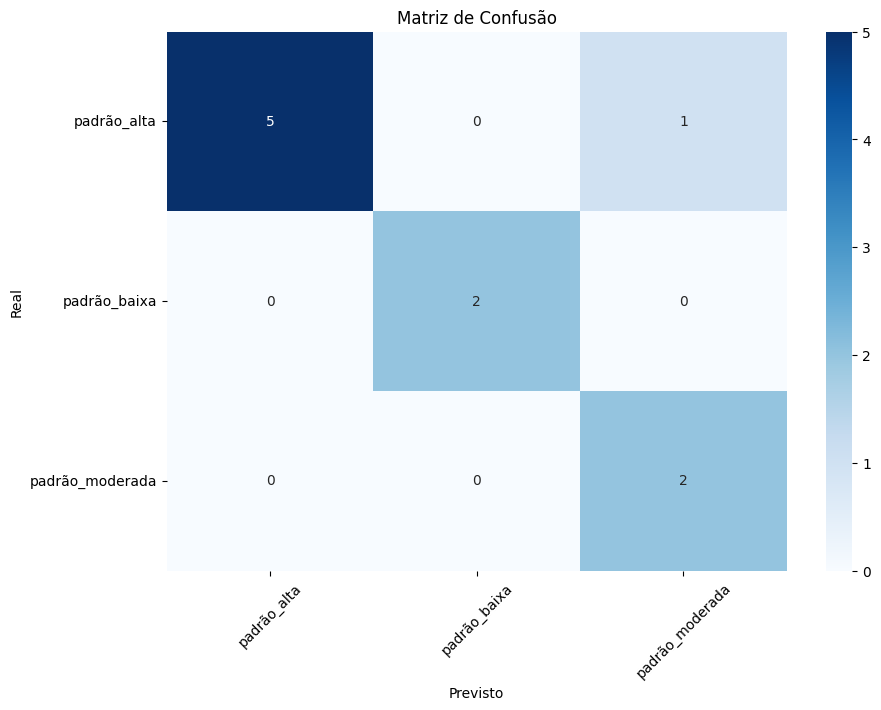

In [ ]:
plt.figure(figsize=(10, 7))
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=modelo_nb.classes_,
            yticklabels=modelo_nb.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(
    df_tracks,
    x='classe_faixa',
    color='classe_faixa',
    title='Distribuição das Classes',
    labels={'classe_faixa': 'Classe'},
    text_auto=True
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

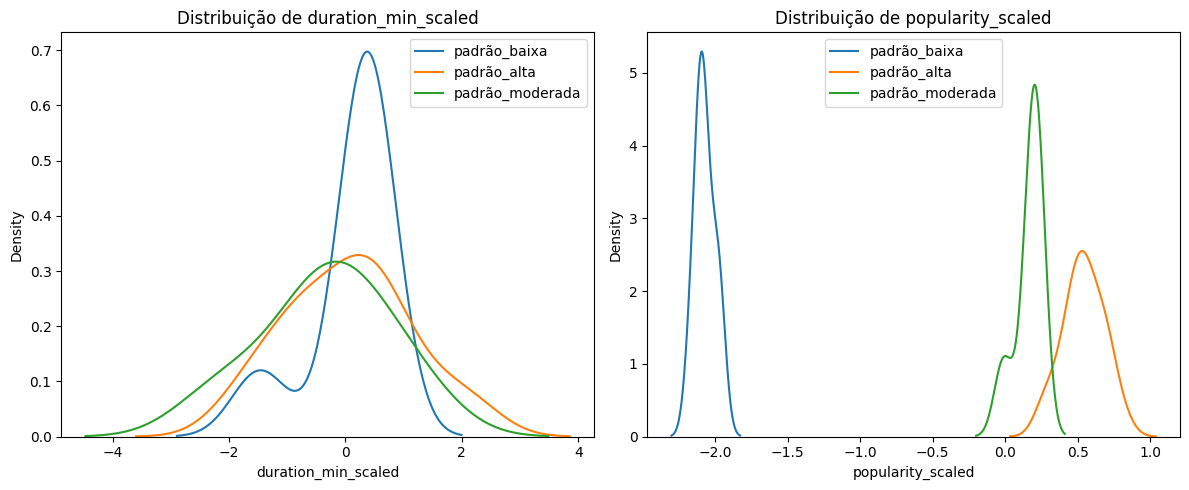

In [ ]:
import numpy as np

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['duration_min_scaled', 'popularity_scaled'])
X_train_scaled_df['classe_faixa'] = y_train.values

plt.figure(figsize=(12, 5))

for i, col in enumerate(['duration_min_scaled', 'popularity_scaled']):
    plt.subplot(1, 2, i+1)
    for label in X_train_scaled_df['classe_faixa'].unique():
        sns.kdeplot(X_train_scaled_df[X_train_scaled_df['classe_faixa'] == label][col], label=label)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    df_tracks,
    x='duration_min',
    y='popularity',
    color='classe_faixa',
    hover_data=['track_name', 'artist_name', 'album_name'],
    title='Popularidade x Duração',
    labels={'duration_min': 'Duração (min)', 'popularity': 'Popularidade'}
)
fig.show()